In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [174]:
data_train = pd.read_csv(r"E:\My Doucuments\Machine Learning\NFT\nfts_train.csv")
data_train.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567


In [175]:
data_train.shape

(309910, 9)

In [176]:
data_test = pd.read_csv(r"E:\My Doucuments\Machine Learning\NFT\nfts_predict.csv")
data_test.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date
0,0,0,29,176.364208,NaN,NaN,NaN,2022-06
1,1,1,29,207.209228,NaN,NaN,NaN,2022-05
2,2,2,29,157.293414,NaN,NaN,NaN,2022-10
3,3,3,29,173.372185,NaN,NaN,NaN,2022-06
4,4,4,29,190.077584,NaN,NaN,NaN,2022-06


In [177]:
data_test.shape

(181214, 8)

In [178]:
data_train['source'] = "Train"
data_test['source'] = "Test"

In [179]:
data = pd.concat([data_train,data_test], ignore_index = True)
data.head(10)

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price,source
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732,Train
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357,Train
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572,Train
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910,Train
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567,Train
5,32625,4,45,179.395901,NaN,NaN,NaN,2021-08,2.001691,Train
6,32626,5,45,152.067286,NaN,NaN,NaN,2021-10,2.502283,Train
7,32627,6,45,139.320270,NaN,NaN,NaN,2022-08,3.191687,Train
8,32628,7,45,107.340146,NaN,NaN,NaN,2021-08,1.996968,Train
9,32629,8,45,144.603692,NaN,NaN,NaN,2022-10,2.730321,Train


In [180]:
data.shape

(491124, 10)

In [181]:
twitter_stats = pd.read_csv(r"E:\My Doucuments\Machine Learning\NFT\collections_twitter_stats.csv")
twitter_stats.head(8)

,collection_id,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2,183.000000,8.500000,41.000000,123,3,6,243,14,76
1,1,16,36.375000,3.562500,13.937500,0,0,0,125,21,34
2,2,1,15.000000,9.000000,1.000000,15,9,1,15,9,1
3,3,526,1.178707,0.306084,2.655894,0,0,0,21,8,13
4,4,26,8.153846,0.884615,1.153846,0,0,0,30,6,12
5,5,19,7.842105,5.157895,4.000000,0,0,0,67,75,55
6,6,12,0.000000,0.000000,111.833333,0,0,31,0,0,463
7,7,12,0.000000,0.000000,111.833333,0,0,31,0,0,463


In [182]:
twitter_stats.shape

(48, 11)

In [183]:
data = pd.merge(data,twitter_stats, how="outer", on = ['collection_id'])
data

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price,source,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732,Train,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491119,618137,7140,42,134.963415,NaN,NaN,NaN,2021-04,NaN,Test,668,1.252994,0.302395,0.314371,0,0,0,80,6,13
491120,618138,7141,42,128.686047,NaN,NaN,NaN,2021-04,NaN,Test,668,1.252994,0.302395,0.314371,0,0,0,80,6,13
491121,618139,7142,42,22134.000000,NaN,NaN,NaN,2021-04,NaN,Test,668,1.252994,0.302395,0.314371,0,0,0,80,6,13
491122,618140,7143,42,22134.000000,NaN,NaN,NaN,2021-04,NaN,Test,668,1.252994,0.302395,0.314371,0,0,0,80,6,13


In [184]:
data.shape

(491124, 20)

In [185]:
collections = pd.read_csv(r"E:\My Doucuments\Machine Learning\NFT\collections.csv")
collections.head()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,True,True,True
1,45,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
2,44,10000,2022-04,verified,8,own,500.0,250,True,False,True,True,False
3,53,9999,2022-07,verified,9,own,900.0,250,False,False,True,True,False
4,6,9602,2021-06,verified,8,own,NaN,250,False,False,True,True,False


In [186]:
df = pd.merge(data, collections, how="outer", on = ['collection_id'])
df.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price,source,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732,Train,31,187.967742,8.290323,60.935484,0,0,2,591,28,380,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False


In [187]:
df.shape

(491124, 32)

## Exploratory Data Analysis (EDA)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         491124 non-null  int64  
 1   nft_id               491124 non-null  int64  
 2   collection_id        491124 non-null  int64  
 3   rarity_score         491124 non-null  float64
 4   openrarity_score     119106 non-null  float64
 5   openrarity_rank      119106 non-null  float64
 6   openrarity_max_rank  119106 non-null  float64
 7   last_sale_date       491124 non-null  object 
 8   last_sale_price      309910 non-null  float64
 9   source               491124 non-null  object 
 10  n_tweets_in_range    491124 non-null  int64  
 11  avg_likes            491124 non-null  float64
 12  avg_replies          491124 non-null  float64
 13  avg_retweets         491124 non-null  float64
 14  min_likes            491124 non-null  int64  
 15  min_replies      

In [189]:
pd.options.display.max_columns = None

In [190]:
df.describe()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,n_of_traits,seller_fees,platform_fees
count,491124.000000,491124.000000,491124.000000,491124.000000,119106.000000,119106.000000,119106.000000,3.099100e+05,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,491124.000000,458431.000000,491124.0
mean,314342.118687,8475.126591,29.863554,992.592973,1.000000,5222.424084,10440.518714,2.162269e+00,33.472891,76.811526,18.180304,36.475851,15.099486,3.908461,5.627960,251.916306,83.865305,150.174088,18130.201283,11.324932,668.056589,250.0
std,171016.990222,8788.308131,17.302700,3569.306554,0.155006,3579.656120,3340.138672,1.275132e+01,106.212299,161.066870,51.995005,80.185407,41.760935,10.077800,11.084891,745.279066,357.587370,436.473244,15171.179824,9.685436,268.229338,0.0
min,0.000000,0.000000,0.000000,0.000000,0.601661,1.000000,3332.000000,6.490000e-08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,200.000000,250.0
25%,186199.750000,2701.000000,13.000000,114.449411,0.899691,2278.000000,9854.000000,4.077085e-03,3.000000,6.666667,0.884615,1.000000,0.000000,0.000000,0.000000,12.000000,4.000000,1.000000,9124.000000,8.000000,500.000000,250.0
50%,319074.500000,5751.000000,35.000000,173.653341,0.979058,4675.000000,9999.000000,8.103344e-03,5.000000,11.333333,4.000000,4.000000,0.000000,0.000000,1.000000,26.000000,9.000000,13.000000,10000.000000,9.000000,750.000000,250.0
75%,464529.250000,9943.000000,44.000000,267.680822,1.071452,7725.000000,15000.000000,3.252062e-01,19.000000,48.600000,9.000000,27.414634,10.000000,2.000000,4.000000,169.000000,47.000000,88.000000,24919.000000,12.000000,900.000000,250.0
max,618141.000000,48256.000000,60.000000,152922.000000,3.663833,15555.000000,15555.000000,1.024002e+03,668.000000,707.875000,353.400000,442.000000,236.000000,52.000000,46.000000,5079.000000,2601.000000,2990.000000,58351.000000,80.000000,1000.000000,250.0


#### We note that platform fees column is same for all the NFT collections...so we can drop the column

In [191]:
df = df.drop(['platform_fees'], axis = 1)

In [192]:
df.isnull().sum()

global_index                0
nft_id                      0
collection_id               0
rarity_score                0
openrarity_score       372018
openrarity_rank        372018
openrarity_max_rank    372018
last_sale_date              0
last_sale_price        181214
source                      0
n_tweets_in_range           0
avg_likes                   0
avg_replies                 0
avg_retweets                0
min_likes                   0
min_replies                 0
min_retweets                0
max_likes                   0
max_replies                 0
max_retweets                0
total_supply                0
creation_date               0
verification_status         0
n_of_traits                 0
contract_type               0
seller_fees             32693
openrarity_enabled          0
has_website                 0
has_own_twitter             0
has_discord                 0
has_medium                  0
dtype: int64

In [193]:
### We can fill the seller fees with the mean of the other seller fees

In [194]:
df['seller_fees'] = df['seller_fees'].fillna(collections['seller_fees'].mean())

### Experiment 1: Dropping the openrarity_score, openrarity_rank, openrarity_max_rank, openrarity_enabled

In [195]:
df = df.drop(['openrarity_score', 'openrarity_rank', 'openrarity_max_rank', 'openrarity_enabled'], axis = 1)

In [196]:
df.isnull().sum()

global_index                0
nft_id                      0
collection_id               0
rarity_score                0
last_sale_date              0
last_sale_price        181214
source                      0
n_tweets_in_range           0
avg_likes                   0
avg_replies                 0
avg_retweets                0
min_likes                   0
min_replies                 0
min_retweets                0
max_likes                   0
max_replies                 0
max_retweets                0
total_supply                0
creation_date               0
verification_status         0
n_of_traits                 0
contract_type               0
seller_fees                 0
has_website                 0
has_own_twitter             0
has_discord                 0
has_medium                  0
dtype: int64

## Label encoding of catagorical data

In [197]:
le = LabelEncoder()

In [198]:
df.last_sale_date.unique()

array(['2022-11', '2021-08', '2022-08', '2022-09', '2021-10', '2022-10',
       '2022-04', '2021-11', '2022-01', '2022-07', '2021-12', '2021-09',
       '2022-02', '2022-06', '2022-03', '2022-05', '2021-07', '2021-05',
       '2021-06', '2021-04', '2021-03', '2021-02'], dtype=object)

In [199]:
def mod_year(date):
    if(date[0:4] == "2021"):
        return 0
    else:
        return 1
def mod_date(date):
    return int(date[5:])

In [200]:
df['year'] = df['last_sale_date'].apply(lambda x: mod_year(x))

In [201]:
df['day'] = df['last_sale_date'].apply(lambda x: mod_date(x))

In [202]:
df['year'].unique()

array([1, 0], dtype=int64)

In [203]:
df['day'].unique()

array([11,  8,  9, 10,  4,  1,  7, 12,  2,  6,  3,  5], dtype=int64)

In [204]:
df = df.drop(['last_sale_date'], axis = 1)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         491124 non-null  int64  
 1   nft_id               491124 non-null  int64  
 2   collection_id        491124 non-null  int64  
 3   rarity_score         491124 non-null  float64
 4   last_sale_price      309910 non-null  float64
 5   source               491124 non-null  object 
 6   n_tweets_in_range    491124 non-null  int64  
 7   avg_likes            491124 non-null  float64
 8   avg_replies          491124 non-null  float64
 9   avg_retweets         491124 non-null  float64
 10  min_likes            491124 non-null  int64  
 11  min_replies          491124 non-null  int64  
 12  min_retweets         491124 non-null  int64  
 13  max_likes            491124 non-null  int64  
 14  max_replies          491124 non-null  int64  
 15  max_retweets     

In [206]:
df.creation_date.unique()

array(['2022-04', '2021-07', '2021-11', '2022-06', '2021-02', '2021-08',
       '2021-04', '2022-07', '2021-12', '2022-03', '2021-03', '2021-06',
       '2021-10', '2021-09', '2022-01', '2022-02', '2022-05', '2021-05',
       '2021-01'], dtype=object)

In [207]:
df['creation_day'] = df['creation_date'].apply(lambda x: mod_date(x))
df['creation_year'] = df['creation_date'].apply(lambda x: mod_year(x))

In [208]:
df = df.drop(['creation_date'], axis = 1)

In [209]:
df.verification_status.unique()

array(['verified', 'approved'], dtype=object)

In [210]:
df.verification_status = df.verification_status.map({'verified':1,
                               'approved': 0})

In [211]:
df.contract_type.unique()

array(['own', 'default'], dtype=object)

In [212]:
df.contract_type = df.contract_type.map({'own':1,
                               'default': 0})

In [213]:
df['has_website'] = df['has_website'].replace({'True': 1,
                                         'False': 0})

In [214]:
df['has_own_twitter'] = df['has_own_twitter'].replace({'True': 1,
                                         'False': 0})

In [215]:
df['has_discord'] = df['has_discord'].replace({'True': 1,
                                         'False': 0})

In [216]:
df['has_medium'] = df['has_medium'].replace({'True': 1,
                                         'False': 0})

In [217]:
df.head()

,global_index,nft_id,collection_id,rarity_score,last_sale_price,source,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,verification_status,n_of_traits,contract_type,seller_fees,has_website,has_own_twitter,has_discord,has_medium,year,day,creation_day,creation_year
0,21928,0,49,2.000000,1.266732,Train,31,187.967742,8.290323,60.935484,0,0,2,591,28,380,1,1,2,1,1000.0,False,True,True,False,1,11,4,1
1,32621,0,45,97.077216,1.200357,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,0,8,7,0
2,32622,1,45,139.453086,3.180572,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,1,8,7,0
3,32623,2,45,127.753445,3.502910,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,0,8,7,0
4,32624,3,45,112.315719,4.009567,Train,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,1,9,7,0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         491124 non-null  int64  
 1   nft_id               491124 non-null  int64  
 2   collection_id        491124 non-null  int64  
 3   rarity_score         491124 non-null  float64
 4   last_sale_price      309910 non-null  float64
 5   source               491124 non-null  object 
 6   n_tweets_in_range    491124 non-null  int64  
 7   avg_likes            491124 non-null  float64
 8   avg_replies          491124 non-null  float64
 9   avg_retweets         491124 non-null  float64
 10  min_likes            491124 non-null  int64  
 11  min_replies          491124 non-null  int64  
 12  min_retweets         491124 non-null  int64  
 13  max_likes            491124 non-null  int64  
 14  max_replies          491124 non-null  int64  
 15  max_retweets     

### Analysing the correlation between certain variables

<AxesSubplot:xlabel='creation_day', ylabel='last_sale_price'>

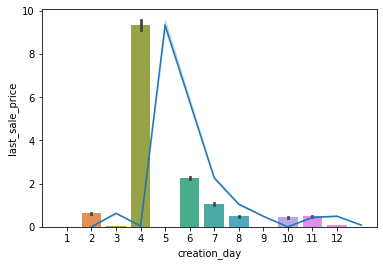

In [338]:
sns.barplot(data = df, x='creation_day',y = 'last_sale_price')
sns.lineplot(data = df, x='creation_day',y = 'last_sale_price')

<AxesSubplot:xlabel='creation_year', ylabel='last_sale_price'>

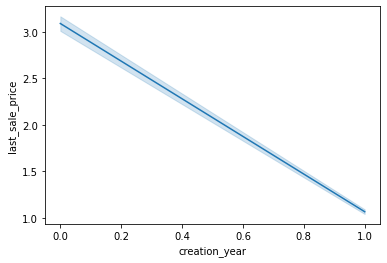

In [220]:
sns.lineplot(data = df, x='creation_year',y = 'last_sale_price')

<AxesSubplot:xlabel='day', ylabel='last_sale_price'>

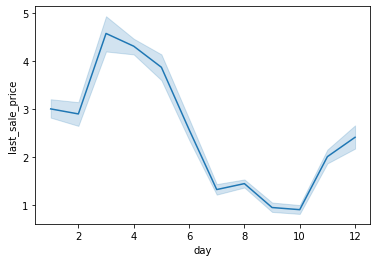

In [221]:
sns.lineplot(data = df, x='day',y = 'last_sale_price')

<AxesSubplot:xlabel='year', ylabel='last_sale_price'>

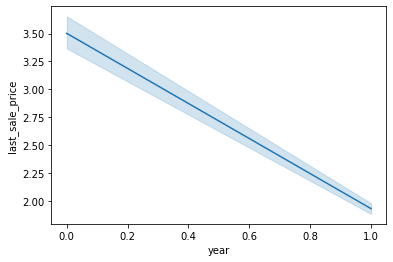

In [222]:
sns.lineplot(data = df, x='year',y = 'last_sale_price')

<AxesSubplot:xlabel='rarity_score', ylabel='last_sale_price'>

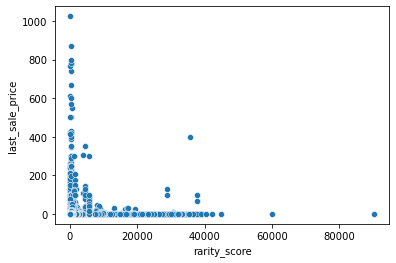

In [340]:
sns.scatterplot(data = df, x='rarity_score',y = 'last_sale_price')

<AxesSubplot:xlabel='n_tweets_in_range', ylabel='last_sale_price'>

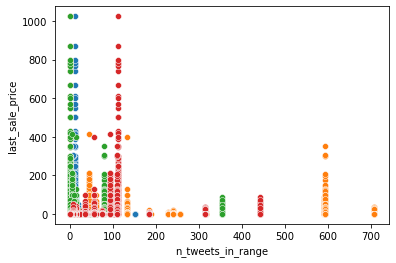

In [224]:
sns.scatterplot(data = df, x='n_tweets_in_range',y = 'last_sale_price', legend = 'auto')
sns.scatterplot(data = df, x='avg_likes',y = 'last_sale_price', legend = 'auto')
sns.scatterplot(data = df, x='avg_replies',y = 'last_sale_price', legend = 'auto')
sns.scatterplot(data = df, x='avg_retweets',y = 'last_sale_price', legend = 'auto')

#### All the above variables follow normal distribution w.r.t the last_year_price

<AxesSubplot:xlabel='total_supply', ylabel='last_sale_price'>

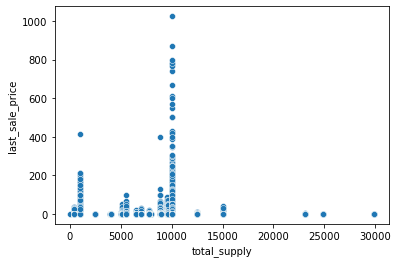

In [225]:
sns.scatterplot(data = df, x='total_supply',y = 'last_sale_price', legend = 'auto')

<AxesSubplot:xlabel='n_of_traits', ylabel='last_sale_price'>

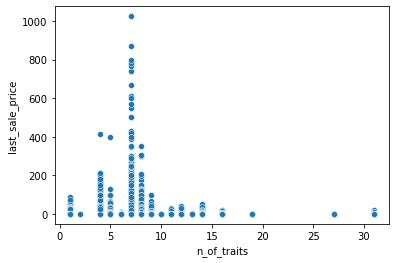

In [226]:
sns.scatterplot(data = df, x='n_of_traits',y = 'last_sale_price', legend = 'auto')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         491124 non-null  int64  
 1   nft_id               491124 non-null  int64  
 2   collection_id        491124 non-null  int64  
 3   rarity_score         491124 non-null  float64
 4   last_sale_price      309910 non-null  float64
 5   source               491124 non-null  object 
 6   n_tweets_in_range    491124 non-null  int64  
 7   avg_likes            491124 non-null  float64
 8   avg_replies          491124 non-null  float64
 9   avg_retweets         491124 non-null  float64
 10  min_likes            491124 non-null  int64  
 11  min_replies          491124 non-null  int64  
 12  min_retweets         491124 non-null  int64  
 13  max_likes            491124 non-null  int64  
 14  max_replies          491124 non-null  int64  
 15  max_retweets     

<AxesSubplot:xlabel='has_website'>

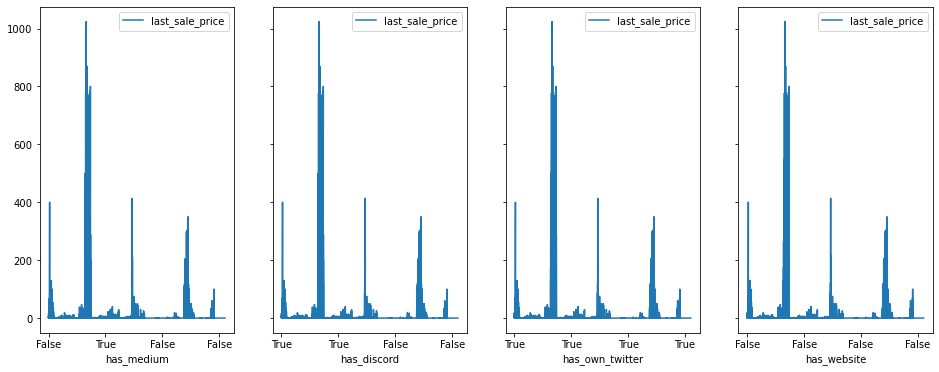

In [228]:
fig,axes = plt.subplots(1,4,sharey=True)
df.plot(kind = 'line', x = 'has_medium', y= 'last_sale_price' ,ax = axes[0], figsize = (16,6))
df.plot(kind = 'line', x = 'has_discord', y= 'last_sale_price',ax = axes[1], figsize = (16,6))
df.plot(kind = 'line', x = 'has_own_twitter', y= 'last_sale_price',ax = axes[2], figsize = (16,6))
df.plot(kind = 'line', x = 'has_website', y= 'last_sale_price',ax = axes[3], figsize = (16,6))

<AxesSubplot:xlabel='global_index', ylabel='last_sale_price'>

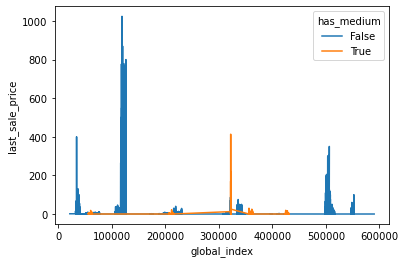

In [229]:
sns.lineplot(data = df, y= 'last_sale_price',x = 'global_index',  hue = 'has_medium')

### training model

In [394]:
train = df.loc[df['source']=='Train']
test = df.loc[df['source']=='Test']

In [395]:
X = train.drop(['last_sale_price','source'],axis = 1)
y = train['last_sale_price']
test = test.drop(['last_sale_price','source'],axis = 1)

In [396]:
test.shape

(181214, 27)

In [350]:
X.shape

(309910, 27)

In [351]:
X.head()

,global_index,nft_id,collection_id,rarity_score,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,verification_status,n_of_traits,contract_type,seller_fees,has_website,has_own_twitter,has_discord,has_medium,year,day,creation_day,creation_year
0,21928,0,49,2.000000,31,187.967742,8.290323,60.935484,0,0,2,591,28,380,1,1,2,1,1000.0,False,True,True,False,1,11,4,1
1,32621,0,45,97.077216,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,0,8,7,0
2,32622,1,45,139.453086,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,1,8,7,0
3,32623,2,45,127.753445,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,0,8,7,0
4,32624,3,45,112.315719,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,1,9,7,0


In [252]:
X = X.drop(['global_index','nft_id','collection_id'],axis = 1)

In [329]:
test = test.drop(['global_index','nft_id','collection_id'],axis = 1)

In [253]:
y.shape

(309910,)

In [254]:
y.head()

0    1.266732
1    1.200357
2    3.180572
3    3.502910
4    4.009567
Name: last_sale_price, dtype: float64

In [255]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size = 0.20,random_state= 49)

## Linear Regression

In [256]:
lr = LinearRegression()
lr.fit(X_train,y_train)
res = lr.predict(X_test)

In [257]:
from math import sqrt   
from sklearn.metrics import r2_score, mean_squared_error 
print(sqrt(mean_squared_error(y_test, res)))

10.862242640887995


## Decision Tree

In [271]:
dt = DecisionTreeRegressor(max_depth = 12,max_leaf_nodes = 30)

In [272]:
dt.fit(X_train,y_train)
res = dt.predict(X_test)
print(sqrt(mean_squared_error(y_test, res)))

8.814867975934897


#### Parameter Tuning

In [314]:
param_grid= [
    {
        'max_depth': [5,6,7],
        "max_leaf_nodes": [59,58,60,62,65],
    }
]

In [315]:
from sklearn.model_selection import GridSearchCV
optimal_param = GridSearchCV(DecisionTreeRegressor() , param_grid , cv=5 )

In [316]:
optimal_param.fit(X_train,y_train)
optimal_param.best_params_

{'max_depth': 6, 'max_leaf_nodes': 60}

In [318]:
res = optimal_param.predict(X_test)
print(sqrt(mean_squared_error(y_test, res)))

7.855581475510629


## Random Forest Regressor

In [308]:
from sklearn.ensemble import RandomForestRegressor

In [309]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
res = rf.predict(X_test)
print(sqrt(mean_squared_error(y_test, res)))

9.053806429863664


In [317]:
### The best algorithm so far is decision tree regressor algorithm.

In [330]:
final = optimal_param.predict(test)

In [331]:
data_test['last_sale_price'] = final.tolist() 

In [332]:
sub = data_test[['global_index','last_sale_price']]

In [335]:
sub.drop_duplicates()

,global_index,last_sale_price
0,0,0.385773
1,1,0.385773
2,2,0.385773
3,3,0.385773
4,4,0.385773
...,...,...
181209,618137,0.005363
181210,618138,0.005363
181211,618139,0.005363
181212,618140,0.005363


In [334]:
sub.to_csv(r"E:\My Doucuments\Machine Learning\NFT\NFT_Pred.csv")

# Trial 2: Variations in EDA

### We only remove the global_index

In [352]:
X.head()

,global_index,nft_id,collection_id,rarity_score,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,verification_status,n_of_traits,contract_type,seller_fees,has_website,has_own_twitter,has_discord,has_medium,year,day,creation_day,creation_year
0,21928,0,49,2.000000,31,187.967742,8.290323,60.935484,0,0,2,591,28,380,1,1,2,1,1000.0,False,True,True,False,1,11,4,1
1,32621,0,45,97.077216,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,0,8,7,0
2,32622,1,45,139.453086,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,1,8,7,0
3,32623,2,45,127.753445,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,0,8,7,0
4,32624,3,45,112.315719,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,1,5,1,500.0,False,True,True,False,1,9,7,0


In [402]:
X.shape

(309910, 26)

In [397]:
test.shape

(181214, 27)

In [354]:
X.nft_id.unique()

array([    0,     1,     2, ..., 29896, 29897, 29898], dtype=int64)

In [364]:
X.collection_id.unique()

array([49, 45, 54, 30,  0, 58, 15, 23,  7, 38, 31, 50, 37,  1,  8, 57, 59,
       19,  6, 48, 14, 36, 25, 13, 43, 18, 60, 44, 24, 51, 46, 34, 26,  4],
      dtype=int64)

In [365]:
X.nft_id.value_counts().shape

(29899,)

In [366]:
X.rarity_score.value_counts().shape

(287582,)

In [ ]:
X = X.drop(['global_index'],axis = 1)
test = test.drop(['global_index'],axis = 1)

In [404]:
print(X.shape,test.shape)

(309910, 26) (181214, 26)


In [406]:
X.n_tweets_in_range.unique()

array([ 31,  11,  19,  13,   2,   3,  18,  35,  12,   4, 151,   8,  16,
        40,   6,  15,   5,  43,   1,  26,   7,   9], dtype=int64)

In [405]:
X.avg_likes = X.avg_likes.apply(lambda x: round(x))
test.avg_likes = test.avg_likes.apply(lambda x: round(x))

In [407]:
X.avg_likes.unique()

array([188, 133,   0, 317, 183,   7,  10,  51, 256, 227,  76,  36,   8,
        32, 591,  43,  19,  11,   2,  24,  12, 241, 708, 594,   5,  61],
      dtype=int64)

In [416]:
X.seller_fees.unique()

array([1000.        ,  500.        ,  750.        ,  800.        ,
        250.        ,  711.95652174,  900.        ,  550.        ])

In [420]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state= 72)

In [422]:
X_train.shape

(263423, 26)

## Decision Tree

In [376]:
dt.fit(X_train,y_train)
res = dt.predict(X_test)

In [377]:
print(sqrt(mean_squared_error(y_test, res)))

7.402497779410711


### Parameter Tuning

In [423]:
param_grid= [
    {
        'criterion': ['squared_error', 'poisson'],
        'max_depth': [3,4,5,6,7],
        "max_leaf_nodes": [30,40,50,62,70,75,80],
    }
]

In [424]:
opt_par = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

In [425]:
opt_par.fit(X_train,y_train)
res_3 = opt_par.predict(X_test)
opt_par.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 62}

In [418]:
res_2 = res

In [419]:
print(sqrt(mean_squared_error(y_test, res_2)))

6.6638173047240485


In [426]:
print(sqrt(mean_squared_error(y_test, res_3)))

6.665451510484303


In [431]:
final2 = opt_par.predict(test)
final2

array([0.24664408, 0.24664408, 0.24664408, ..., 0.00531337, 0.00531337,
       0.00531337])

In [433]:
data_test['last_sale_price'] = final2.tolist() 
data_test['last_sale_price']

0         0.246644
1         0.246644
2         0.246644
3         0.246644
4         0.246644
            ...   
181209    0.005313
181210    0.005313
181211    0.005313
181212    0.005313
181213    0.005313
Name: last_sale_price, Length: 181214, dtype: float64

In [435]:
sub = data_test[['global_index','last_sale_price']]
sub

,global_index,last_sale_price
0,0,0.246644
1,1,0.246644
2,2,0.246644
3,3,0.246644
4,4,0.246644
...,...,...
181209,618137,0.005313
181210,618138,0.005313
181211,618139,0.005313
181212,618140,0.005313


In [437]:
sub.to_csv(r"E:\My Doucuments\Machine Learning\NFT\NFT_Pred3.csv")